# REGRESIÓN LINEAL

Los datos y la información se han obtenido de:
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html#:~:text=La%20regresi%C3%B3n%20lineal%20es%20un,cuando%20hay%20m%C3%A1s%20de%20una

## Regresión Lineal Simple

In [2]:
#------------------------------------------------------------------------------
# PAQUETES QUE SE USARÁN A LO LARGO DEL TRABAJO
#------------------------------------------------------------------------------

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


<AxesSubplot:title={'center':'Distribución de bateos y runs'}, xlabel='Bateos', ylabel='Runs'>

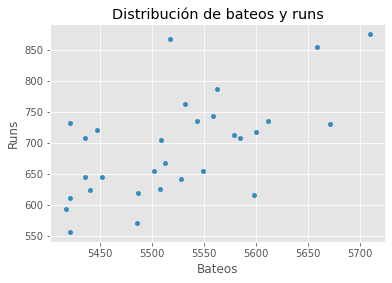

In [4]:
# -- Graficamos
datos.plot(x="bateos", y="runs", kind="scatter", 
           title="Distribución de bateos y runs", 
           xlabel="Bateos", ylabel="Runs")

In [5]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
corr_test

(0.6106270467206685, 0.0003388351359791999)

In [6]:
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206685
P-value:  0.0003388351359791999


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.

In [7]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), # se debe pasar a un array
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8, # entrenamiento se ocupará el 80% y la prueba 20%
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [8]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Thu, 26 Aug 2021   Prob (F-statistic):            0.00906
Time:                        21:04:55   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2367.7028   1066.357     -2.220      0.0

In [9]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Thu, 26 Aug 2021   Prob (F-statistic):            0.00906
Time:                        21:04:55   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [10]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

In [11]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


In [12]:
pred = modelo.predict() # Solamente los valores de predicción

In [13]:
pred 

array([768.18347545, 646.5517777 , 680.27693026, 735.01119425,
       629.41276574, 637.70583604, 760.99614786, 707.92049793,
       665.34940371, 640.47019281, 629.41276574, 728.37673801,
       674.19534537, 688.57000056, 637.70583604, 727.2709953 ,
       678.06544484, 629.41276574, 665.90227507, 700.18029898,
       677.51257349, 683.04128702, 705.70901252, 716.76643958])

In [14]:
# DE MANERA MÁS RÁPIDA E IGUALANDO LA FUNCIÓN LM() (nota: los datos no se dividen en entrenamiento y prueba)
modelo2 = smf.ols(formula = 'runs ~bateos', data = datos)
modelo2 = modelo2.fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           0.000339
Time:                        21:04:55   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

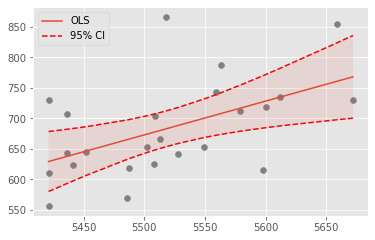

In [15]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [16]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.3367160833608


### Ejemplo De Regresión Lineal Con Mis Datos

In [17]:
# IMPORTAMOS LA LIBRERÍA SEABORN 
import seaborn as sns
# Cargamos los datos TITANIC
datos3 = sns.load_dataset("titanic")
datos3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# USANDO EL ARCHIVO UN11 DE R
UN11 = pd.read_csv("D:\\Documentos\\CONJUNTO DE DATOS\\UN11.csv")
UN11.head()

,Unnamed: 0,region,group,fertility,ppgdp,lifeExpF,pctUrban
0,Afghanistan,Asia,other,5.968,499.0,49.49,23
1,Albania,Europe,other,1.525,3677.2,80.40,53
2,Algeria,Africa,africa,2.142,4473.0,75.00,67
3,Angola,Africa,africa,5.135,4321.9,53.17,59
4,Anguilla,Caribbean,other,2.000,13750.1,81.10,100


In [19]:
# Realizamos la regresión lineal simple fertility~log(ppgdp)
log_ppgdp = np.log(UN11["ppgdp"])
m = smf.ols(formula = 'fertility ~log_ppgdp', data = UN11)
m = m.fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              fertility   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           3.16e-33
Time:                        21:04:56   Log-Likelihood:                -267.03
No. Observations:                 199   AIC:                             538.1
Df Residuals:                     197   BIC:                             544.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0097      0.365     21.927      0.0

In [20]:
# Ahora, aplicando entretamiento y prueba

# División de los datos en train y test
# ==============================================================================
X = UN11["fertility"]
y = np.log(UN11["ppgdp"])
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), # se debe pasar a un array
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8, # entrenamiento se ocupará el 80% y la prueba 20%
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=["log_ppgdp", "fertility"])
ml = smf.ols(formula = 'fertility ~log_ppgdp', data = datos_train)
ml = ml.fit()
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:              fertility   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     154.2
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           4.20e-25
Time:                        21:04:56   Log-Likelihood:                -238.91
No. Observations:                 159   AIC:                             481.8
Df Residuals:                     157   BIC:                             488.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7576      0.199     54.184      0.0

In [21]:
# NOTEMOS QUE SIN DIVIDIR EL DATASET EN TEST Y TRAIN OBTENEMOS UN R2 = 0.52 Y DIVIDIENDO LOS DATOS OBTENEMOS UN R2 = 0.49, SIN EMBARGO

In [23]:
# MATRIZ DE CORRELACIONES PARA UN11
matriz_corr = UN11.corr()
matriz_corr

,fertility,ppgdp,lifeExpF,pctUrban
fertility,1.000000,-0.439989,-0.823588,-0.542985
ppgdp,-0.439989,1.000000,0.548960,0.598309
lifeExpF,-0.823588,0.548960,1.000000,0.601332
pctUrban,-0.542985,0.598309,0.601332,1.000000


<AxesSubplot:>

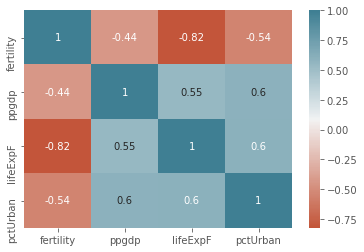

In [42]:
sns.heatmap(matriz_corr, annot=True, cmap = sns.diverging_palette(20, 220, n=200))